               Total_Values
SellerG                    
Jellis         1.800503e+09
Nelson         1.588438e+09
Marshall       1.244748e+09
hockingstuart  1.114167e+09
Barry          8.859425e+08
               Total_Values                      Labels
SellerG                                                
Jellis         1.800503e+09         Jellis 1800503098.0
Nelson         1.588438e+09         Nelson 1588438150.0
Marshall       1.244748e+09       Marshall 1244748138.0
hockingstuart  1.114167e+09  hockingstuart 1114166699.0
Barry          8.859425e+08           Barry 885942476.0


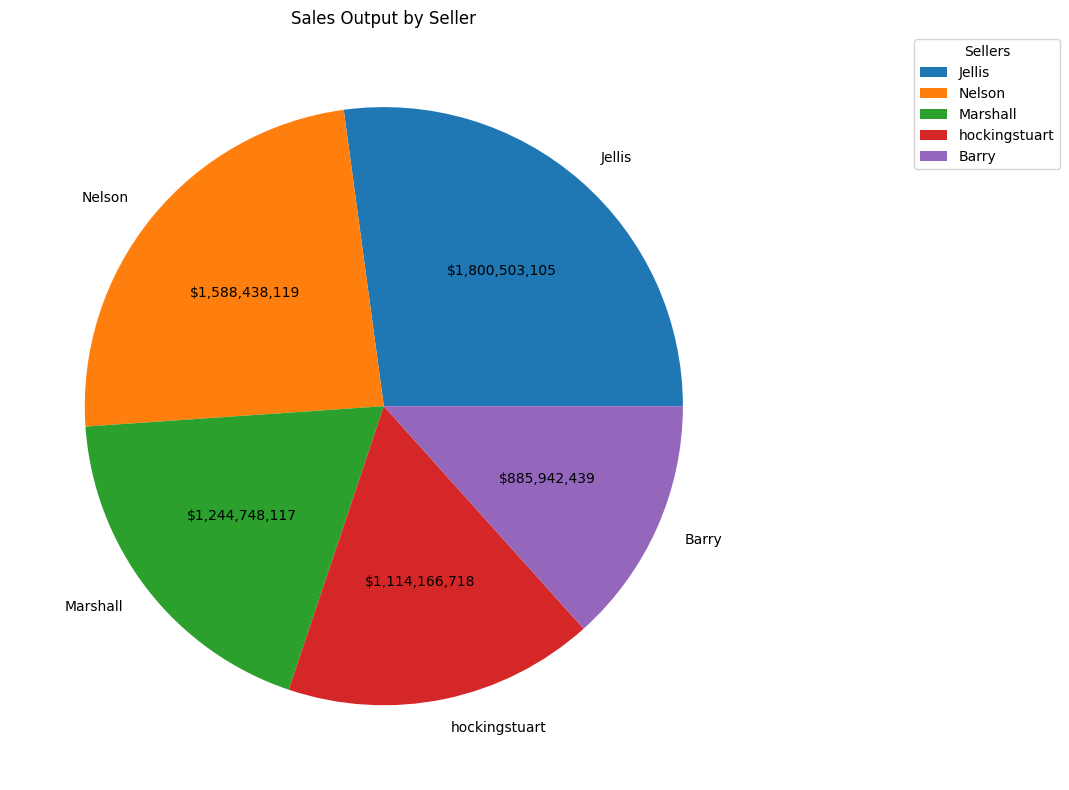

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the melb file
mydata = pd.read_csv('melb_data.csv')

#Group by 'Category' and get the top 2 calues in each group
groupd = mydata.groupby(["SellerG"]).agg(Total_Values=("Price",'sum')).sort_values (by='Total_Values',ascending=False).head(5)
print(groupd)

#Create a file and log the grouped data
with open("/Users/ylemu/Documents/PythonWork/melb_data_grouped.txt", "w") as file:
    file.write(groupd.to_string())
    file.close()

#'kind=bar' : create a bar chart
#'title=Sales' : makes title 'Sales'
groupd['Labels'] = groupd.apply(lambda x: f"{x.name} {x['Total_Values']}", axis=1)
print(groupd)

# Option 2: Position legend to the right with custom formatting
#:,.0f = removes decimal places
fig, ax = plt.subplots(figsize=(12, 8))
groupd.plot(kind='pie',
           y='Total_Values',
           title="Sales Output by Seller",
           autopct=lambda pct: f'${groupd["Total_Values"].sum() * pct/100:,.0f}',
           labels=groupd.index,
           ax=ax)
plt.legend(title="Sellers",
          bbox_to_anchor=(1.2, 1),
          loc='upper left')
plt.ylabel('')
#plt.tight_layout() automatically adjusts the padding between and around subplots to fit nicely within the figure area.
plt.tight_layout()
plt.show()